In [80]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
import spacy

# Data Exploration and Preprocessing

In [2]:
df = pd.read_csv('blogs.csv', encoding="latin-1")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
df.Labels.value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [28]:
X=df.Data
Y=df.Labels

In [29]:
# Feature extraction using Term Frequence Inverse document frequency Vectorizer
tf=TfidfVectorizer(encoding='latin-1',stop_words='english',ngram_range=(1,4),max_features=6000)
X=tf.fit_transform(X)

In [30]:
X.shape

(2000, 6000)

In [31]:
# spltting the data into training & testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y,random_state=42)

# Naive Bayes Model for Text Classification

In [32]:
clf = MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB()

## Evaluation
* Cleaning of text is very important for applying to ML models to interpret
* Curse of dimentionalyty is a challenge in ML because model has difficulty in establishing the relationship b/w features
* So cleaning & reducing the maximum dimentions helps the ML model to generelize & make better predictions

In [33]:
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.95      0.70      0.81        30
           comp.graphics       0.93      0.93      0.93        30
 comp.os.ms-windows.misc       1.00      1.00      1.00        30
comp.sys.ibm.pc.hardware       0.97      1.00      0.98        30
   comp.sys.mac.hardware       1.00      0.87      0.93        30
          comp.windows.x       0.97      0.93      0.95        30
            misc.forsale       0.91      1.00      0.95        30
               rec.autos       0.81      1.00      0.90        30
         rec.motorcycles       1.00      0.97      0.98        30
      rec.sport.baseball       1.00      0.93      0.97        30
        rec.sport.hockey       0.94      1.00      0.97        30
               sci.crypt       0.97      1.00      0.98        30
         sci.electronics       1.00      0.80      0.89        30
                 sci.med       0.97      0.93      0.95        30
         

# Sentiment analysis 

In [35]:
# loading a Affin Lexicon data set
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [49]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [68]:
sentiment=pd.DataFrame(df['Data'],columns=['Data'])

In [69]:
type(sentiment)

pandas.core.frame.DataFrame

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dushy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
# Removing leading & trailing spaces
sentiment['Data'] = sentiment.Data.apply(lambda x : x.strip())
# converting all words to lowercase
sentiment['Data'] = sentiment.Data.apply(lambda x : x.lower())
# Removing Punctuations
sentiment['Data'] = sentiment.Data.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))
# Removing Stopwords
sentiment['Data'] = sentiment.Data.apply(lambda x : ' '.join([y for y in x.split() if y not in stopwords.words('english')]) )

In [71]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [72]:
# testing the above defined function
calculate_sentiment(text = 'amazing') 

4

In [74]:
# calculating the sentiment score & adding to seperate column
sentiment['sentiment_value'] = sentiment.Data.apply(calculate_sentiment) 

In [75]:
sentiment.head()

,Data,sentiment_value
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-12
1,newsgroups altatheism path cantaloupesrvcscmue...,9
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,-32
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-132
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,11


<Axes: ylabel='sentiment_value'>

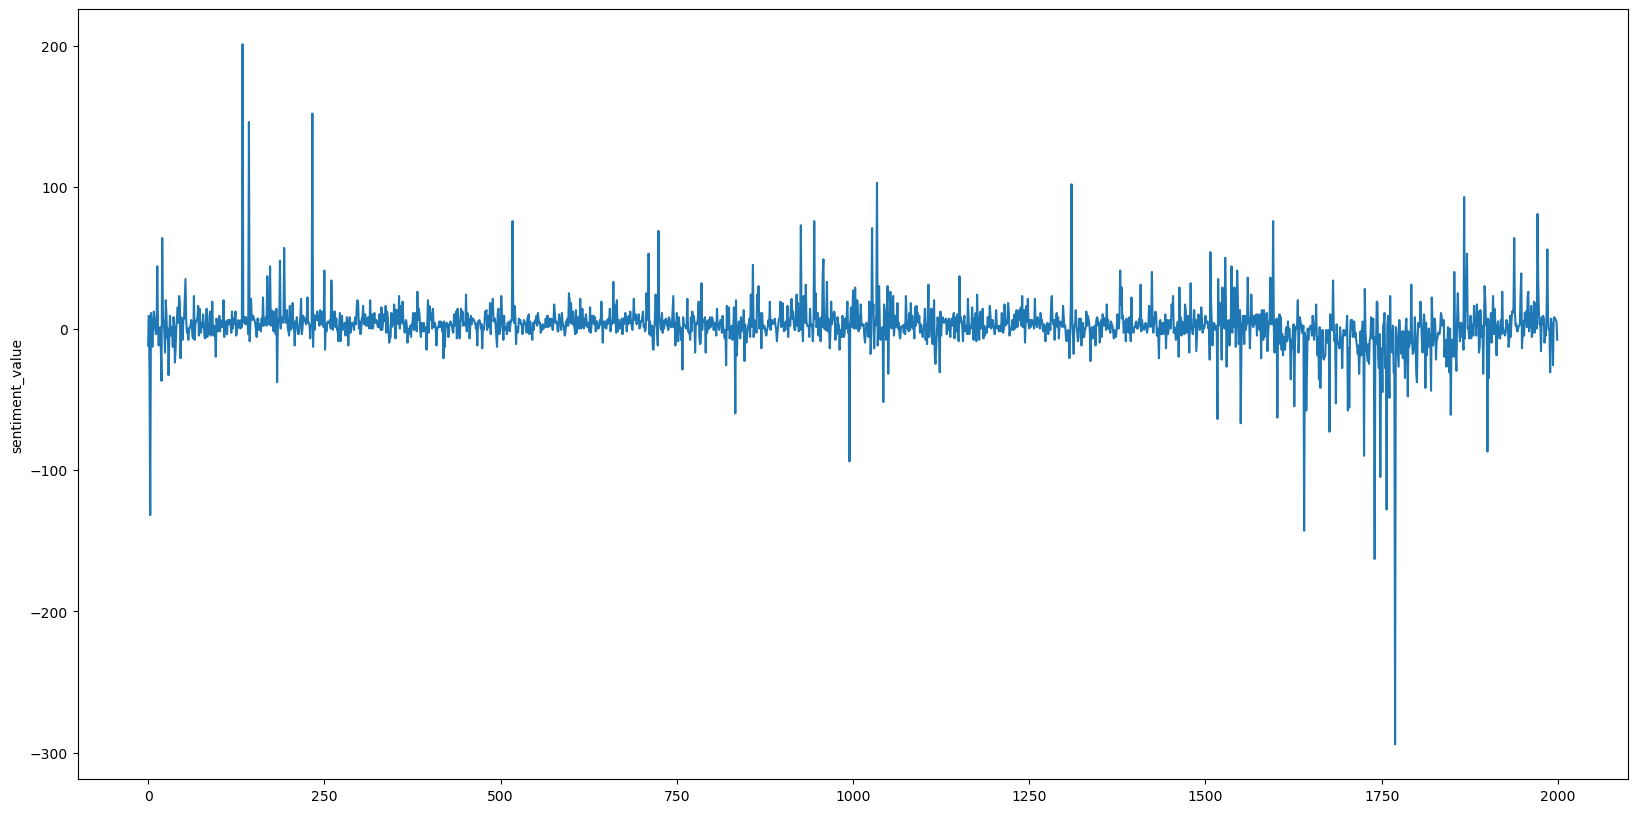

In [84]:
plt.figure(figsize=(20, 10))
sns.lineplot(y='sentiment_value',x=sentiment.index,data=sentiment) 

In [90]:
def catogory(a:int) :
    if a==0:
        return 'Neutral'
    if a > 0:
        return 'Positive'
    if a < 0 :
        return 'Negative'

In [92]:
sentiment['category'] = sentiment.sentiment_value.apply(lambda x : catogory(x) )

In [93]:
sentiment.head()

,Data,sentiment_value,category
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-12,Negative
1,newsgroups altatheism path cantaloupesrvcscmue...,9,Positive
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,-32,Negative
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-132,Negative
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,11,Positive


In [76]:
sentiment.sentiment_value.describe()

count    2000.000000
mean        2.199000
std        18.046114
min      -294.000000
25%        -2.000000
50%         2.000000
75%         7.000000
max       201.000000
Name: sentiment_value, dtype: float64

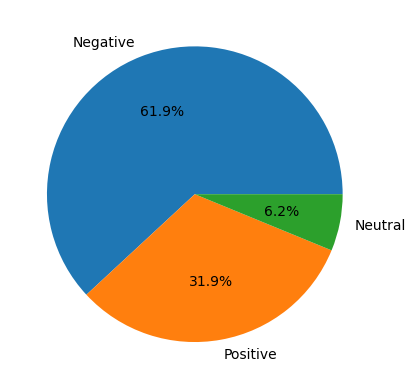

In [94]:
plt.pie(sentiment.category.value_counts(),labels=list(sentiment.category.unique()),autopct='%1.1f%%')
plt.show()

* here in this given Blog posts there are lot of negitive comments
* overall sentiment of the BlogPost is positive (mean=2) with standard deviation (+_18)
* highest positive score is 201 & highest Negative score is 294